SENSITIVITY STUDY (NOTEBOOK)

This is the Notebook for the Performance Analysis of the FFT Method proposed by Carr, it consists in:

1) Generating the grid for each parameter (alpha, eta, N)

2) Computing the Elapsed Time for each pricing and saving results (parameters used, elapsed time, ...)

3) Computing the Error on the BS pricing formula, used as a benchmark and plotting it against two choosable parameter
   between the available
   (possibility to choose also between a contourf plot or a 3D plot)

4) Selecting Default Stable Configurations

Settings (Step 0):

Description:
Here are installed the required standard libraries and imported custom functions, moreover here are setted the global parameters for the Grid Generation Phase

In [1]:
# ---- Standard Libraries ------------------------------------
import numpy as np
from scipy.stats import norm

# ---- Custom Modules ----------------------------------------
from src import error_time_module as etm
from src import grid_module as gm
from src.fft_pricer import fft_pricer

# ---- Global Parameters -------------------------------------
ALPHA_LB = 1.2 #exe
ALPHA_UP = 1.5 #exe
MAX_ETA = 0.5 #exe
MIN_ETA = 0.2 #exe
MIN_POWER = 12 #exe, for N param
MAX_POWER = 14 #exe, for N param

C:\Users\user\Desktop\Progetti\BSQ_Projects\FFT_Pricing\Weekly Task\Sprint 3\src\characteristic_functions.py:12: SyntaxWarning: invalid escape sequence '\s'
  | (\sigma) | Annual volatility of the asset                                  |


Step 1: Generating Parameters Grids

Description:
Here are generated the parameters with respect to we will loop to check which could be the best combination for the FFT Pricer

In [2]:
#// Grid Generation
alpha_grid = gm.generate_alpha_grid(ALPHA_LB, ALPHA_UP)
eta_grid = gm.generate_eta_grid(MIN_ETA, MAX_ETA)
n_grid = gm.generate_n_grid(MIN_POWER, MAX_POWER)
print(alpha_grid)
print(eta_grid)
print(n_grid)

Generating alpha grid from 1.2 to 1.5000.
Generating eta grid from 0.2 to 0.5.
Generating N grid (powers of 2): [ 4096  8192 16384]
[1.2        1.23333333 1.26666667 1.3        1.33333333 1.36666667
 1.4        1.43333333 1.46666667 1.5       ]
[0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5       ]
[ 4096  8192 16384]


Step 2: Running FFT Pricer vs Parameters

Description:
Here is the core of the research phase, where it is computed the benchmark for the error of the pricer (i.e: BS Formula) and are plotted the main results (Elapsed Time for each run, Error, Parameters used, ...)
Everything Supported by Graphic Plots

In [3]:
#// BS Formula to use as a benchmark
S0 = 100
r = 0.05
sigma = 0.2
T= 1.0
K = 100
#t0 = 0

def bs_formula(S, K, T, r, sigma, option_type='call'):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type.lower() == 'call':
        price = (S * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
    elif option_type.lower() == 'put':
        price = (K * np.exp(-r * T) * norm.cdf(-d2)) - (S * norm.cdf(-d1))

    return price

bs = bs_formula(S0, K, T, r, sigma)

In [4]:
#// Getting Runs ("Experiments") Log
exp_df = etm.fft_runs(alpha_grid, eta_grid, n_grid, bs, fft_pricer, S0, T, sigma, r, K)

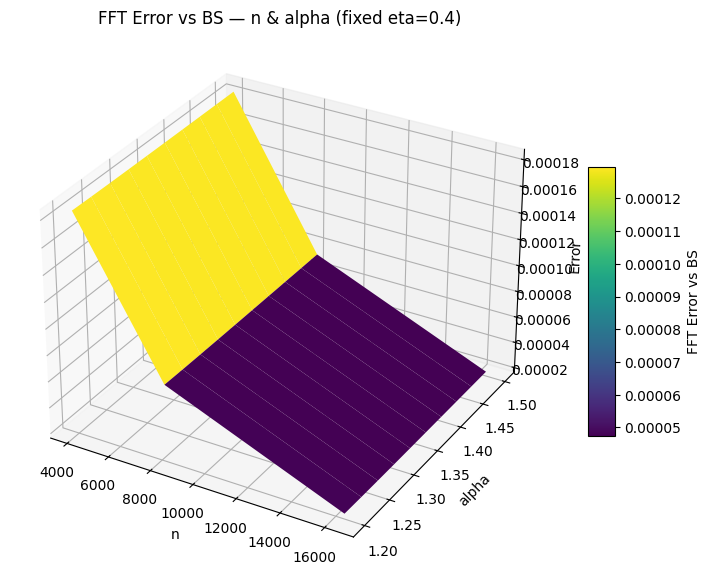

In [5]:
#// Plotting Errors
etm.plot_error_surface(exp_df, "n", "alpha", "eta", 0.4, "surface3d")
#exp_df.head()